In [29]:
import numpy
import scipy
import seaborn
import pandas
import struct
import matplotlib.pyplot as plt
%matplotlib ipympl

In [30]:
plt.close("all")

In [31]:
# parameters
# sample_size = 20
# sig_level = 0.05
hit_str = "not rejected"
miss_str = "rejected"

In [32]:
test_type = []
tested_sig_level = []
tested_sample_size = []
outcome = []
n_occurences = []

for sample_size in [5, 10, 20, 50, 100, 500, 1000]:
    for sig_level in [0.05]:
        hits_k = 0
        misses_k = 0

        hits_s = 0
        misses_s = 0

        for _ in range(0, 1000):
            # generate normal distribution sample
            normal_sample = numpy.random.normal(size=sample_size)

            # test Kolmogorov-Smirnov
            stat, p_value = scipy.stats.kstest(normal_sample, "norm")
            if p_value > sig_level:
                hits_k = hits_k + 1
            else:
                misses_k = misses_k + 1
            
            # test Shapiro-Wilk
            res = scipy.stats.shapiro(normal_sample)
            if res.pvalue > sig_level:
                hits_s = hits_s + 1
            else:
                misses_s = misses_s + 1
        
        # gather results
        test_type.append("Kolmogorov-Smirnov")
        tested_sig_level.append(sig_level)
        tested_sample_size.append(sample_size)
        outcome.append(hit_str)
        n_occurences.append(hits_k)

        test_type.append("Kolmogorov-Smirnov")
        tested_sig_level.append(sig_level)
        tested_sample_size.append(sample_size)
        outcome.append(miss_str)
        n_occurences.append(misses_k)


        test_type.append("Shapiro-Wilk")
        tested_sig_level.append(sig_level)
        tested_sample_size.append(sample_size)
        outcome.append(hit_str)
        n_occurences.append(hits_s)

        test_type.append("Shapiro-Wilk")
        tested_sig_level.append(sig_level)
        tested_sample_size.append(sample_size)
        outcome.append(miss_str)
        n_occurences.append(misses_s)


results = pandas.DataFrame({"test type": test_type, 
                            "significane level": tested_sig_level, 
                            "sample size": tested_sample_size, 
                            "count": n_occurences,
                            "hpothesis": outcome})

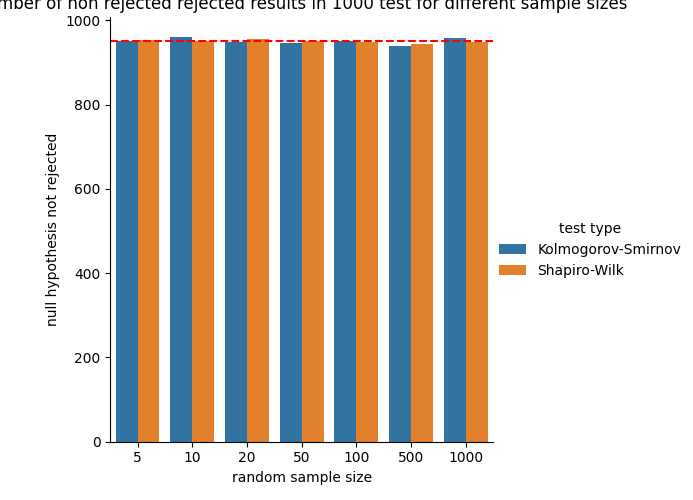

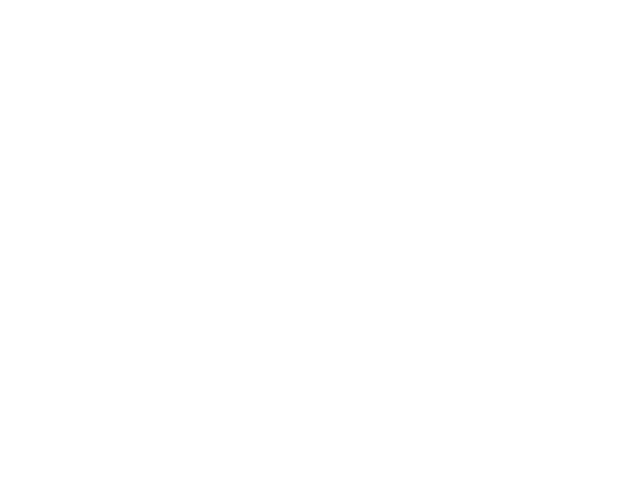

In [39]:
plt.figure()
seaborn.catplot(data=results[results["hpothesis"] == hit_str],
                x="sample size",
                y="count",
                hue="test type",
                kind="bar",
                errorbar=None)
plt.axhline(y=(1-sig_level)*1000, color='r', linestyle='--', label='expected result')
plt.xlabel("random sample size")
plt.ylabel("null hypothesis not rejected count")
plt.title("number of non rejected rejected results in 1000 test for different sample sizes")
plt.show()